In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_imoveis = pd.read_csv('data/imoveis_tratados.csv')
df_imoveis

,endereco,bairro_cidade,preco,area,quartos,vagas
0,SQN 303 Bloco I,"ASA NORTE, BRASILIA",14.077106,4.553877,3.0,1.0
1,QS 5 Rua 400,"AREAL, AGUAS CLARAS",13.197473,4.110874,2.0,1.0
2,SQSW 303 Bloco J,"SUDOESTE, BRASILIA",14.240125,4.382027,2.0,1.0
3,SQN 402,"ASA NORTE, BRASILIA",14.151984,4.955827,2.0,2.0
4,Condomínio Residencial Santa Mônica,"JARDIM BOTANICO, BRASILIA",13.910822,5.484797,3.0,2.0
...,...,...,...,...,...,...
245,SHIN QI 12,"LAGO NORTE, BRASILIA",15.121137,7.090910,6.0,8.0
246,Quadra 104,"NORTE, AGUAS CLARAS",14.508658,5.062595,4.0,2.0
247,RODOVIA BR 0020 KM 12,"5, ALTO DA BOA VISTA, SOBRADINHO",14.626441,5.726848,4.0,2.0
248,SGCV,"PARK SUL, BRASILIA",12.923915,3.433987,1.0,1.0


<Axes: >

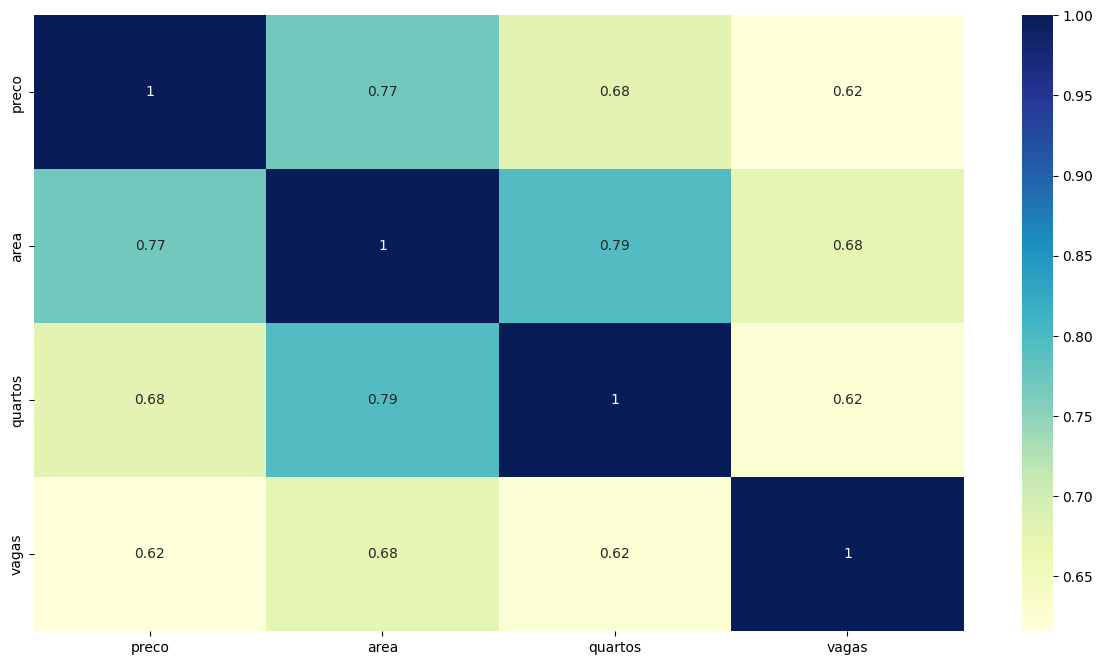

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_imoveis.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Realiza o one hot encoding da coluna 'bairro_cidade' e concatena ao dataframe original (sem a coluna original)
bairro_encoded = pd.DataFrame(
    encoder.fit_transform(df_imoveis[['bairro_cidade']]),
    columns=encoder.get_feature_names_out(['bairro_cidade']),
    index=df_imoveis.index
)
df_imoveis_ohe = pd.concat([df_imoveis.drop(columns=['bairro_cidade']), bairro_encoded], axis=1)
df_imoveis_ohe


,endereco,preco,area,quartos,vagas,"bairro_cidade_ ALPHAVILLE BRASILIA, ALPHAVILLE","bairro_cidade_ AREAL, AGUAS CLARAS","bairro_cidade_ ARNIQUEIRA, AGUAS CLARAS","bairro_cidade_ ASA NORTE, BRASILIA","bairro_cidade_ ASA SUL, BRASILIA",...,"bairro_cidade_ SETOR HABITACIONAL CONTAGEM, SOBRADINHO","bairro_cidade_ SETOR INDUSTRIAL, TAGUATINGA","bairro_cidade_ SOBRADINHO, SOBRADINHO","bairro_cidade_ SUDOESTE, BRASILIA","bairro_cidade_ SUL, AGUAS CLARAS","bairro_cidade_ TAQUARI, BRASILIA","bairro_cidade_ VICENTE PIRES, VICENTE PIRES","bairro_cidade_5, ALTO DA BOA VISTA, SOBRADINHO","bairro_cidade_5, SETOR HABITACIONAL CONTAGEM, SOBRADINHO","bairro_cidade_6, REGIAO DOS LAGOS, SOBRADINHO"
0,SQN 303 Bloco I,14.077106,4.553877,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,QS 5 Rua 400,13.197473,4.110874,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SQSW 303 Bloco J,14.240125,4.382027,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SQN 402,14.151984,4.955827,2.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Condomínio Residencial Santa Mônica,13.910822,5.484797,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SHIN QI 12,15.121137,7.090910,6.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,Quadra 104,14.508658,5.062595,4.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,RODOVIA BR 0020 KM 12,14.626441,5.726848,4.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
248,SGCV,12.923915,3.433987,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = df_imoveis_ohe.drop(columns=['endereco', 'preco'])
y = df_imoveis_ohe['preco']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,area,quartos,vagas,"bairro_cidade_ ALPHAVILLE BRASILIA, ALPHAVILLE","bairro_cidade_ AREAL, AGUAS CLARAS","bairro_cidade_ ARNIQUEIRA, AGUAS CLARAS","bairro_cidade_ ASA NORTE, BRASILIA","bairro_cidade_ ASA SUL, BRASILIA","bairro_cidade_ COLONIA AGRICOLA SAMAMBAIA, VICENTE PIRES","bairro_cidade_ GRANDE COLORADO, SOBRADINHO",...,"bairro_cidade_ SETOR HABITACIONAL CONTAGEM, SOBRADINHO","bairro_cidade_ SETOR INDUSTRIAL, TAGUATINGA","bairro_cidade_ SOBRADINHO, SOBRADINHO","bairro_cidade_ SUDOESTE, BRASILIA","bairro_cidade_ SUL, AGUAS CLARAS","bairro_cidade_ TAQUARI, BRASILIA","bairro_cidade_ VICENTE PIRES, VICENTE PIRES","bairro_cidade_5, ALTO DA BOA VISTA, SOBRADINHO","bairro_cidade_5, SETOR HABITACIONAL CONTAGEM, SOBRADINHO","bairro_cidade_6, REGIAO DOS LAGOS, SOBRADINHO"
132,4.919981,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,6.216606,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,5.921578,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,6.660575,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,5.370638,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,5.888878,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,6.021023,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,6.003887,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,4.787492,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 0.0559
RMSE: 0.2364
MAE: 0.1629
R²: 0.8831
Coeficientes: [ 0.7451409   0.02072263  0.03844262 -0.25415843 -0.14454884 -0.3455662
  0.61043553  0.71269267 -0.32022104 -0.59078694 -0.10360569  0.27991802
 -0.1631721   0.12285445  0.04323246  0.20870569  0.82104529  0.14842056
  0.63463548  0.20146399 -0.16719006 -0.7368779  -0.22198009  0.05280733
  0.79172799  0.14516867  0.21917237 -0.19290091 -0.05895909 -0.91557453
 -0.77673868]
Intercepto: 10.004044746508631


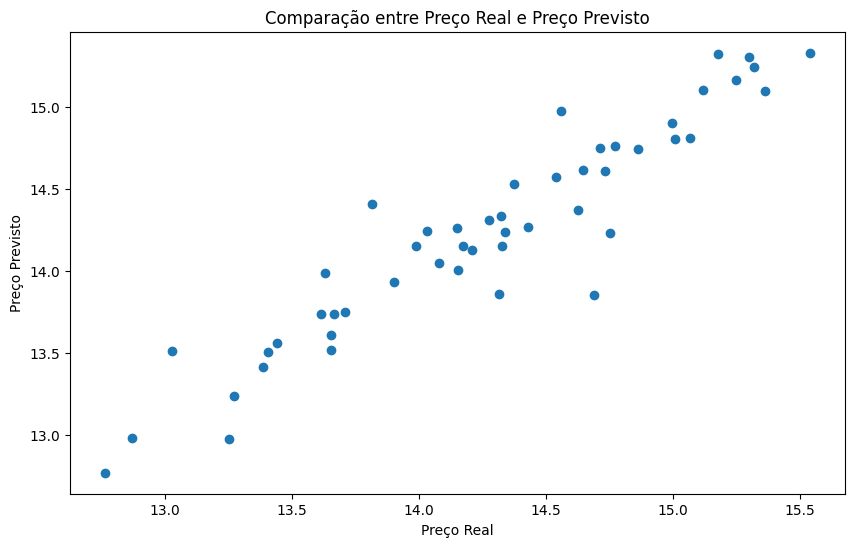

In [ ]:
# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Comparação entre Preço Real e Preço Previsto")
plt.show()